<a href="https://colab.research.google.com/github/gpdsec/DataScience-Python/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing Libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2. Loading and Processing Data**

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
## Adding color dimention to data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

10


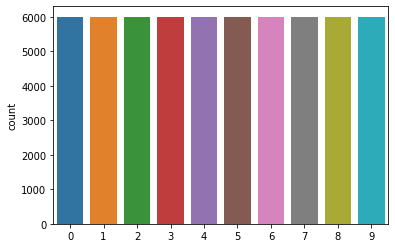

In [ ]:
K = len(set(y_train))      ###### Number Of Labels
print(K)
sbn.countplot(y_train)

In [ ]:
# Spliting X_train Set into training set and validation test
x_train, val_x, y_train, val_y = train_test_split(x_train, y_train, test_size=0.20)

## **3. Some Variables and Traps**

In [ ]:
es = EarlyStopping(monitor='loss', patience=12)
filepath="/content/drive/My Drive/Colab Notebooks/Model/bestmodel.h5"
md = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# Important Variables
epochs = 10
batch_size = 128
input_shape = (28, 28, 1)
adam = tf.keras.optimizers.Adam(0.001)

## **4. Building Model with Basic Functional API**

In [ ]:


i = Input(shape=input_shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
#x = BatchNormalization()(x)
#x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1180

In [ ]:
# Compiling Model
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit Model
History = model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs = epochs,
          validation_data = (val_x, val_y),
          callbacks = [es,md],
          shuffle= True
        )

Epoch 1/10
250/263 [===========================>..] - ETA: 0s - loss: 0.5163 - accuracy: 0.8127
Epoch 00001: loss did not improve from 0.18265
263/263 [==============================] - 1s 5ms/step - loss: 0.5104 - accuracy: 0.8143 - val_loss: 1.2156 - val_accuracy: 0.8538
Epoch 2/10
248/263 [===========================>..] - ETA: 0s - loss: 0.3420 - accuracy: 0.8732
Epoch 00002: loss did not improve from 0.18265
263/263 [==============================] - 1s 4ms/step - loss: 0.3422 - accuracy: 0.8732 - val_loss: 0.4603 - val_accuracy: 0.8765
Epoch 3/10
260/263 [============================>.] - ETA: 0s - loss: 0.2879 - accuracy: 0.8923
Epoch 00003: loss did not improve from 0.18265
263/263 [==============================] - 1s 4ms/step - loss: 0.2878 - accuracy: 0.8922 - val_loss: 0.3128 - val_accuracy: 0.8855
Epoch 4/10
249/263 [===========================>..] - ETA: 0s - loss: 0.2560 - accuracy: 0.9052
Epoch 00004: loss did not improve from 0.18265
263/263 [==========================

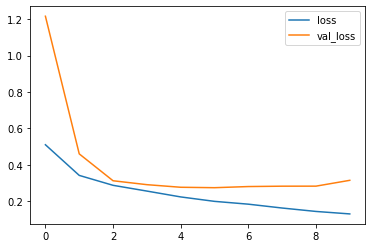

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label='val_loss')
plt.legend()

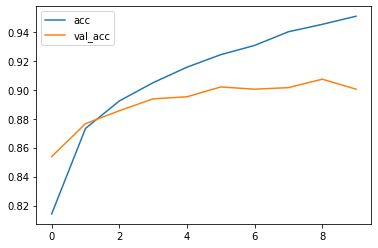

In [ ]:
# Plot accuracy per iteration
plt.plot(History.history['accuracy'], label='acc')
plt.plot(History.history['val_accuracy'], label='val_acc')
plt.legend()

## **5. Loading Model and Making Prediction**

In [ ]:
model1 = load_model(filepath)
model1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1180

[[822   1  27  11   4   3 125   0   7   0]
 [  0 981   1  13   1   0   2   0   2   0]
 [ 16   2 866   3  47   1  65   0   0   0]
 [ 15  20  27 857  37   0  43   0   1   0]
 [  0   0  77  17 832   1  72   0   1   0]
 [  0   0   0   0   0 987   0  12   0   1]
 [ 88   3  65  20  52   0 754   0  18   0]
 [  0   0   0   0   0  12   0 981   0   7]
 [  2   1   4   2   3   5   7   4 972   0]
 [  0   0   0   0   0  18   0  60   1 921]]


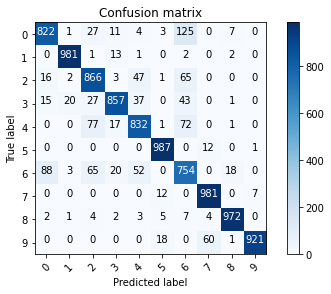

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model1.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))